In [33]:
# Import Data Modules, Plotting Modules, and Stats/Regressions Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
from scipy.misc import lena
from scipy.stats import mode
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [16]:
df = pd.read_csv('/home/dsi-student/Desktop/ECON628-01-RPanlilio/syria2.csv')

In [17]:
df.ad1 = df.ad1.fillna(np.mean(df.ad1))
df.ad2 = df.ad2.fillna(np.mean(df.ad2))
df.ad3 = df.ad3.fillna(np.mean(df.ad3))
df.ad4 = df.ad4.fillna(np.mean(df.ad4))
df.ad5 = df.ad5.fillna(np.mean(df.ad5))
df.adp = df.adp.fillna(np.mean(df.adp))
df.a1 = df.a1.fillna(np.mean(df.a1))
df.a2 = df.a2.fillna(np.mean(df.a2))
df.a3 = df.a3.fillna(np.mean(df.a3))
df.d1 = df.d1.fillna(np.mean(df.d1))
df.d2 = df.d2.fillna(np.mean(df.d2))
df.d3 = df.d3.fillna(np.mean(df.d3))
df.p1 = df.p1.fillna(np.mean(df.p1))
df.p2 = df.p2.fillna(np.mean(df.p2))
df.p3 = df.p3.fillna(np.mean(df.p3))
df.p4 = df.p4.fillna(np.mean(df.p4))
df.p5 = df.p5.fillna(np.mean(df.p5))
df.p6 = df.p6.fillna(np.mean(df.p6))

In [18]:
# Normalizing Psychological Indicators
df_indicators = df[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3', 'd1', 'd2', 'd3', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]
df_norm = (df_indicators - df_indicators.mean()) / df_indicators.std()

# Grouping Psychological Indicators into Anxiety, Depression, and PTSD
df_anxiety = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3']]
df_depression = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'd1', 'd2', 'd3']]
df_ptsd = df_norm[['adp', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

# Performing PCA to reduce dimensionality
pca = decomposition.PCA()
pca.n_components = 1
anxiety = pca.fit_transform(df_anxiety)
depression = pca.fit_transform(df_depression)
ptsd = pca.fit_transform(df_ptsd)

In [26]:
df_covariates = df[['age', 'female', 'urban', 'agriculture', 'bluecollar', 'whitecollar', 'popsize', 'famsize', 'years']]

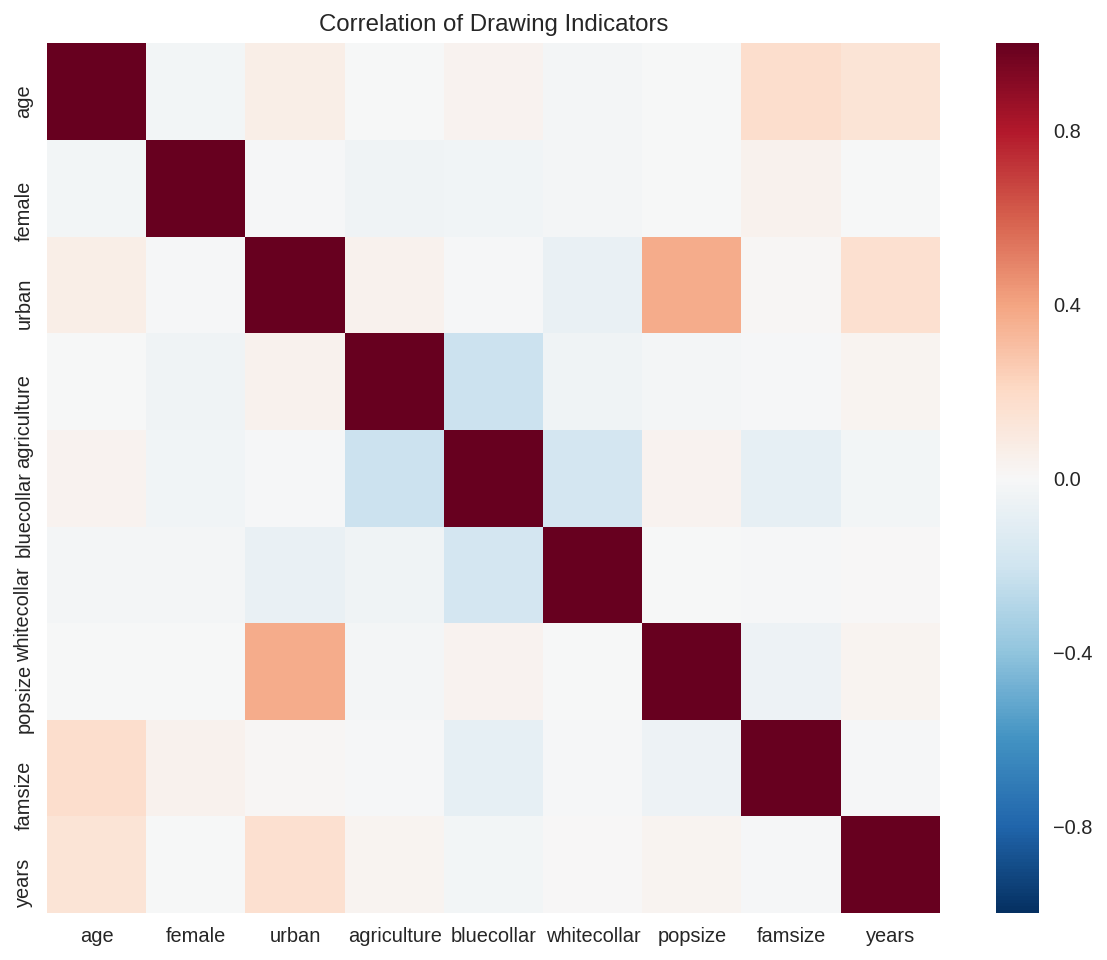

In [27]:
# Correlation of Drawing Indicators
df_covariates.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title('Correlation of Drawing Indicators')
sns.heatmap(df_covariates.corr(), ax=ax)
plt.show()

In [20]:
from scipy.spatial import distance
import random
import math
from numpy.random import permutation
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [34]:
# Define Euclidean Distance
def dist(x, xprime): return np.sqrt(np.sum((x - xprime)**2))

In [39]:
# Randomly Shuffling Data
random_indices = permutation(df.index)

# Cutoff for Test Data
test_cutoff = math.floor(len(df)/3)

# Generating Test Data Set
test = df.loc[random_indices[1:test_cutoff]]

# Generating Train Data Set
train = df.loc[random_indices[test_cutoff:]]

/home/dsi-student/Downloads/conda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dsi-student/Downloads/conda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [54]:
# Selecting Covariates
x_columns =['age', 'female', 'urban', 'agriculture', 'bluecollar', 'whitecollar', 'popsize', 'famsize', 'years']

# Selecting Independent Variables
y_columns = ['anxiety1', 'depression1', 'ptsd1']

In [46]:
# Creating KNN Model
knn = KNeighborsRegressor(n_neighbors=5)

In [55]:
# Fitting Model on Training Data
knn.fit(train[x_columns], train[y_columns])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [56]:
# Predicting on Test Data
predictions = knn.predict(test[x_columns])

In [57]:
# Actual Values of Test Set
actual = test[y_columns]

In [58]:
# Mean Squared Error of Predictions
mse = (((predictions - actual) ** 2).sum()) / len(predictions)

In [59]:
print mse

anxiety1       0.276639
depression1    0.261183
ptsd1          0.243458
dtype: float64


In [15]:
from sklearn import neighbors

In [53]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x_columns, y_columns).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(x_columns, y_columns, c='k', label='data')
    plt.plot(y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

/home/dsi-student/Downloads/conda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


NameError: name 'T' is not defined